# Group Notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import eli5

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from bs4 import BeautifulSoup 
import re
from src import prepare, acquire



plt.style.use('classic')

ModuleNotFoundError: No module named 'utils'

# Acquire

In [ ]:
acquire.scrape_github_data()

https://github.com/search?q=candles&type=Repositories

In [ ]:
# this was my attempt at getting readme data from github

# url = 'https://github.com/search?q=candles&type=Repositories'
# headers={'user-agent': 'Codeup DS Germain'} 
# response = requests.get(url, headers=headers)

# soup = BeautifulSoup(response.text)


# article = soup.select('div', class_='jupiterx-post-content')

# art_dict = {'title':[], 'content':[]}

# soup.title.string

# Explore

In [ ]:
# getting the data 
df = pd.read_csv('data/processed.csv')

In [ ]:
df.head() # check_yo_head

In [ ]:
df.groupby('language').sum()

In [ ]:
df.language.value_counts()

In [ ]:
import nltk
import unicodedata

In [ ]:
go = clean(' '.join(df[df.language == 'Go'].language))
java = clean(' '.join(df[df.language == 'Java'].language))
python = clean(' '.join(df[df.language == 'Python'].language))
C_plus_plus = clean(' '.join(df[df.language == 'C++'].language))
Swift = clean(' '.join(df[df.language == 'Swift'].language))
javascript = clean(' '.join(df[df.language == 'JavaScript'].language))
c = clean(' '.join(df[df.language == 'C'].language))
all_languages = clean(' '.join(df.language))

In [ ]:
go_freq = pd.Series(go).value_counts()
java_freq = pd.Series(java).value_counts()
python_freq = pd.Series(python).value_counts()
c_plus_plus_freq = pd.Series(C_plus_plus).value_counts()
Swift_freq = pd.Series(Swift).value_counts()
javascript_freq = pd.Series(javascript).value_counts()
c_script = pd.Series(c).value_counts()

all_freq = pd.Series(all_languages).value_counts()

java_freq.head()

In [ ]:
word_counts = (pd.concat([all_freq, go_freq, java_freq, python_freq, c_plus_plus_freq, Swift_freq, javascript_freq, c_script], axis=1, sort=True)
                .set_axis(['all', 'go', 'java', 'python', 'c++', 'swift', 'js', 'c'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

In [ ]:
word_counts.sort_values(by='all', ascending=False).head(10)

In [ ]:
word_counts.plot.barh(stacked=True)
plt.title('Proportion of Coding Languages')

In [ ]:
from wordcloud import WordCloud

In [ ]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_languages))

plt.figure(figsize=(10, 10))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)

axs[0].set_title('All Languages')

for ax in axs: ax.axis('off')

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(all_languages))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

# Next

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import unicodedata
import re
import json
import pandas as pd 
# # Opening JSON file
# f = open('data.json',)
 
# returns JSON object as
# a dictionary
# data = json.load(f)

In [ ]:
df = pd.read_csv('data/processed.csv')

In [ ]:
#data is cleaned 
df.info()

In [ ]:
df.language.value_counts()

In [ ]:
df.readme.unique().value_counts()

In [ ]:
# import plotly.express as px

# fig = px.histogram(df, x='lang_freq', template='plotly_white', title='readme counts by language')
# fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Number of readme counts')
# fig.show()

read_me_df = df[['readme', 'language']].copy()

In [ ]:
#how many language observations do we have?
read_me_df.language.value_counts(normalize = True)

In [ ]:
read_me_df['language'].value_counts()
# Go            106
# Python        102
# Java          102
# Swift         100
# C++           100
# JavaScript     97
# C              94

In [ ]:
# combine all readmes in single string by language
def clean(language):
    '''Simplified text cleaning function'''
    language = language.lower()
    language = unicodedata.normalize('NFKD', language).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', language)

In [ ]:
go_words = clean(' '.join(read_me_df[read_me_df.language == 'Go'].readme))
python_words = clean(' '.join(read_me_df[read_me_df.language == 'Python'].readme))
java_words = clean(' '.join(read_me_df[read_me_df.language == 'Java'].readme))
cplus_plus_words = clean(' '.join(read_me_df[read_me_df.language == 'C++'].readme))
javascript_words = clean(' '.join(read_me_df[read_me_df.language == 'JavaScript'].readme))
swift_words = clean(' '.join(read_me_df[read_me_df.language == 'Swift'].readme))
c_words = clean(' '.join(read_me_df[read_me_df.language == 'C'].readme))

In [ ]:
all_words = clean(' '.join(read_me_df.readme))

In [ ]:
# Represent text as word frequencies.

go_freq = pd.Series(go_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
cplus_plus_freq = pd.Series(cplus_plus_words.split()).value_counts()
javascript_freq = pd.Series(javascript_words.split()).value_counts()
swift_freq = pd.Series(swift_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [ ]:
pd.concat([go_freq, python_freq, java_freq, cplus_plus_freq, javascript_freq, swift_freq, c_freq, all_freq], axis = 1).fillna(0).astype(int)

In [ ]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([go_freq, python_freq, java_freq, cplus_plus_freq, javascript_freq, swift_freq, c_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['Go', 'Python', 'Java', 'C++', 'JavaScript', 'Swift', 'C', 'all']
word_counts.head()

In [ ]:
# sort by 'all'

word_counts.sort_values('all', ascending=False).head(20)

In [ ]:
# word_counts.sort_values(['Go', 'Python', 'Java', 'C++', 'JavaScript', 'Swift', 'C'], ascending=[True, False]).head(20)


plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['Go', 'Python', 'Java', 'C++', 'JavaScript', 'Swift', 'C']].plot.barh()
plt.title('Count by Language for the top 20 most frequent words')




plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'Go')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of Go vs all for the most common 20 words')

In [ ]:
# =============================================================================
# Looking at Bigrams
# =============================================================================

In [ ]:
# =============================================================================
# #Go Bigrams
# =============================================================================
list(nltk.bigrams(go_words.split()))

# what are the most common bigrams? by language bigrams? 
# visualize 20 most common bigrams, most common by language bigrams
# ngrams

# Find the most common bigram and then find a representative text

pd.Series(nltk.bigrams(go_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Go bigrams')

In [ ]:
# =============================================================================
# Python Birgrams
# =============================================================================
pd.Series(nltk.bigrams(python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Python bigrams')

In [ ]:
# =============================================================================
# Java Bigrams
# =============================================================================
pd.Series(nltk.bigrams(java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams')

In [ ]:
# =============================================================================
# C++ Bigrams
# =============================================================================
pd.Series(nltk.bigrams(cplus_plus_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C++ bigrams')

In [ ]:
# =============================================================================
# Javascript Bigrams
# =============================================================================
pd.Series(nltk.bigrams(javascript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Javascript bigrams')

In [ ]:
# =============================================================================
# Swift Bigrams
# =============================================================================
pd.Series(nltk.bigrams(swift_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Swift bigrams')

In [ ]:
# =============================================================================
# C Bigrams
# =============================================================================
pd.Series(nltk.bigrams(c_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C bigrams')

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import eli5

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


plt.style.use('classic')

In [3]:
df = pd.read_csv('data/processed.csv')

In [4]:
df.head()

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


# Bag of Words

In [5]:
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df.readme)

In [6]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [9]:
cv.get_feature_names()[:100]

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaacn',
 'aaaaaavvvvvxxxxxtttt',
 'aaaab',
 'aaaabbbbcccc',
 'aaaacc',
 'aaaaoooooo',
 'aaabf',
 'aaad',
 'aaaffaaaa',
 'aab',
 'aabc',
 'aabqxjyv',
 'aac',
 'aacaf',
 'aacanakin',
 'aacb',
 'aaccess',
 'aacigyxew',
 'aad',
 'aadadd',
 'aadc',
 'aadvic',
 'aae',
 'aaf',
 'aafb',
 'aaff',
 'aagtorr',
 'aagxjzrqm',
 'aah',
 'aalen',
 'aan',
 'aandroid',
 'aanze',
 'aap',
 'aapcmdackhlfobmkcpplkjpfceihngkh',
 'aapl',
 'aaplhn',
 'aaqobk',
 'aar',
 'aarch',
 'aaron',
 'aarono',
 'aaronpearc',
 'aaronrandal',
 'aaronsw',
 'aaronvb',
 'aarsaeth',
 'aas',
 'ab',
 'aba',
 'ababc',
 'abacus',
 'abandon',
 'abb',
 'abbaswasim',
 'abbba',
 'abbc',
 'abber',
 'abbr',
 'abbrev',
 'abbrevi',
 'abc',
 'abd',
 'abdol',
 'abe',
 'abeginn',
 'abeiv',
 'abel',
 'abelhadigit',
 'aberr',
 'abf',
 'abfa',
 'abfc',
 'abffb',
 'abhigupta',
 'abhik',
 'abhinav',
 'abi',
 'abid',
 'abil',
 'abilita',
 'abl',
 'ablad',
 'a

In [13]:
list(cv.vocabulary_.items())[:100]

[('img', 12394),
 ('src', 25508),
 ('https', 11951),
 ('swift', 26274),
 ('org', 19426),
 ('asset', 1565),
 ('imag', 12334),
 ('svg', 26237),
 ('alt', 820),
 ('logo', 15546),
 ('height', 11476),
 ('program', 21210),
 ('languag', 14565),
 ('architectur', 1366),
 ('main', 15921),
 ('packag', 19681),
 ('maco', 15855),
 ('build', 3193),
 ('status', 25698),
 ('ci', 4143),
 ('job', 13579),
 ('oss', 19494),
 ('increment', 12504),
 ('ra', 21904),
 ('lastcompletedbuild', 14599),
 ('badg', 1979),
 ('icon', 12156),
 ('ubuntu', 28080),
 ('linux', 15289),
 ('cento', 3798),
 ('amazon', 858),
 ('communiti', 4738),
 ('host', 11811),
 ('platform', 20600),
 ('os', 19455),
 ('github', 10451),
 ('com', 4681),
 ('appl', 1249),
 ('continu', 4978),
 ('integr', 12763),
 ('blob', 2722),
 ('node', 18333),
 ('ppc', 20903),
 ('le', 14727),
 ('json', 13745),
 ('extern', 8466),
 ('aarch', 45),
 ('docker', 6936),
 ('android', 969),
 ('lts', 15716),
 ('armv', 1433),
 ('arm', 1424),
 ('window', 29819),
 ('vs', 29319),

In [14]:
tfid = TfidfVectorizer()
bag_of_words = tfid.fit_transform(df.readme)

In [16]:
bag_of_words.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
tfid.get_feature_names()[:100]

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaacn',
 'aaaaaavvvvvxxxxxtttt',
 'aaaab',
 'aaaabbbbcccc',
 'aaaacc',
 'aaaaoooooo',
 'aaabf',
 'aaad',
 'aaaffaaaa',
 'aab',
 'aabc',
 'aabqxjyv',
 'aac',
 'aacaf',
 'aacanakin',
 'aacb',
 'aaccess',
 'aacigyxew',
 'aad',
 'aadadd',
 'aadc',
 'aadvic',
 'aae',
 'aaf',
 'aafb',
 'aaff',
 'aagtorr',
 'aagxjzrqm',
 'aah',
 'aalen',
 'aan',
 'aandroid',
 'aanze',
 'aap',
 'aapcmdackhlfobmkcpplkjpfceihngkh',
 'aapl',
 'aaplhn',
 'aaqobk',
 'aar',
 'aarch',
 'aaron',
 'aarono',
 'aaronpearc',
 'aaronrandal',
 'aaronsw',
 'aaronvb',
 'aarsaeth',
 'aas',
 'ab',
 'aba',
 'ababc',
 'abacus',
 'abandon',
 'abb',
 'abbaswasim',
 'abbba',
 'abbc',
 'abber',
 'abbr',
 'abbrev',
 'abbrevi',
 'abc',
 'abd',
 'abdol',
 'abe',
 'abeginn',
 'abeiv',
 'abel',
 'abelhadigit',
 'aberr',
 'abf',
 'abfa',
 'abfc',
 'abffb',
 'abhigupta',
 'abhik',
 'abhinav',
 'abi',
 'abid',
 'abil',
 'abilita',
 'abl',
 'ablad',
 'a

In [20]:
#idf score. The higher the score, the more relevant that word is in that particular document. 
pd.Series(dict(zip(tfid.get_feature_names(), tfid.idf_))).sort_values().tail(15)

icij                                     6.860786
iconifi                                  6.860786
ichinaski                                6.860786
ichait                                   6.860786
icg                                      6.860786
icerik                                   6.860786
icerigi                                  6.860786
icepa                                    6.860786
iceland                                  6.860786
iceimg                                   6.860786
icedotaku                                6.860786
icecreamtruckday                         6.860786
icecreamday                              6.860786
ichart                                   6.860786
zzzzzzzzzzzzzzzzzzzzzzzzzbbbbddddllll    6.860786
dtype: float64

# Bag of Ngrams

In [21]:
tfid = TfidfVectorizer(ngram_range=(2, 2))
bag_of_words = tfid.fit_transform(df.readme)

In [23]:
#idf score
pd.Series(dict(zip(tfid.get_feature_names(), tfid.idf_))).sort_values().tail(15)

get bool                                                                       6.860786
get book                                                                       6.860786
get boilerpl                                                                   6.860786
get blurri                                                                     6.860786
get block                                                                      6.860786
get bug                                                                        6.860786
get blob                                                                       6.860786
get black                                                                      6.860786
get bitmask                                                                    6.860786
get bite                                                                       6.860786
get bigger                                                                     6.860786
get benefit                     

# Modeling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
df.head()

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


In [26]:
X = df.readme
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [27]:
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_bow, y_train)

tree.score(X_bow, y_train)
# Return the mean accuracy on the given test data and labels

0.6892857142857143

In [28]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_train)
tree.fit(X_tfidf, y_train)
tree.score(X_tfidf, y_train)
# Return the mean accuracy on the given test data and labels

0.7267857142857143

In [29]:
# Whatever transformations we apply to X_train need to be applied to X_test
tree.score(tfidf.transform(X_test), y_test)

0.5460992907801419

<AxesSubplot:>

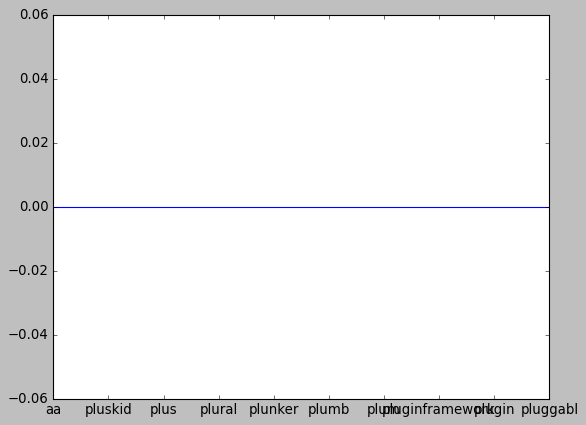

In [30]:
pd.Series(dict(zip(cv.get_feature_names(), tree.feature_importances_))).sort_values().head(10).plot()

<AxesSubplot:>

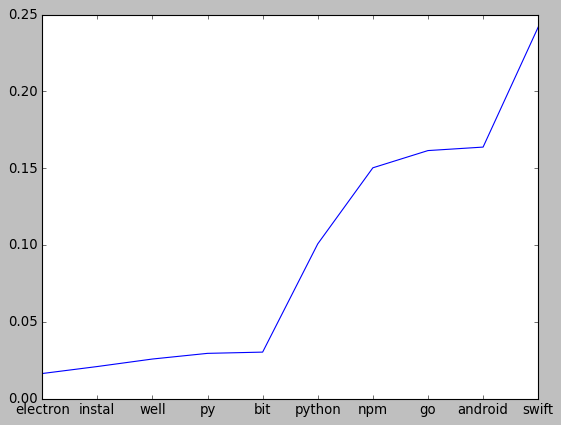

In [31]:
pd.Series(dict(zip(cv.get_feature_names(), tree.feature_importances_))).sort_values().tail(10).plot()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import eli5

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (8,8)
cmap_train, cmap_test = "bone", "plasma"

## Classification

In [ ]:
df = pd.read_csv('data/processed.csv')
X_train, X_test, y_train, y_test = train_test_split(df.readme, df.language,
                    test_size=.22, random_state=0, stratify=df.language)
print(df.info())

In [ ]:
df.language.value_counts()

### Dummy (baseline)

In [ ]:
clf = DummyClassifier(strategy='stratified', random_state=2)
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))
plot_confusion_matrix(clf, X_train, y_train, values_format='.0f', cmap=cmap_train)   

In [ ]:
def report_and_conf_matrix(clf, X, y, cmap=cmap_train):
    scores = cross_val_score(estimator=clf, X=X, y=y)
    print("-------MAXIMIZE THIS-------\nCross-validation mean accuracy: %0.3f (stdev %0.3f)\n---------------------------" % (scores.mean(), scores.std()))
    print(np.round(scores,3))
    print(classification_report(y, clf.predict(X)))
    plot_confusion_matrix(clf, X, y, values_format='.0f', cmap=cmap)

### Naive Bayes

In [ ]:
nb_clf = GaussianNB()
nb_vec = TfidfVectorizer(max_features=800)
X = nb_vec.fit_transform(X_train)
nb_clf.fit(X.todense(), y_train)

report_and_conf_matrix(nb_clf, X=X.todense(), y=y_train)

### Logistic regression

In [ ]:
lr_clf = LogisticRegression(C=3)
lr_vec = TfidfVectorizer(max_features=900)
X = lr_vec.fit_transform(X_train)
lr_clf.fit(X, y_train)

report_and_conf_matrix(lr_clf, X=X, y=y_train)

### kNN

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_vec = TfidfVectorizer(max_features=1200)
X = knn_vec.fit_transform(X_train)
knn_clf.fit(X, y_train)

report_and_conf_matrix(knn_clf, X=X, y=y_train)

### Random forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=125,
                                max_depth=20,
                                random_state=36)
rf_vec = TfidfVectorizer(min_df=15, max_df=.35)
X = rf_vec.fit_transform(X_train)
rf_clf.fit(X, y_train)

report_and_conf_matrix(rf_clf, X=X, y=y_train)

In [ ]:
eli5.explain_weights(rf_clf, feature_names=list(rf_vec.vocabulary_.keys()))

### Test set

In [ ]:
X = TfidfVectorizer(vocabulary=rf_vec.vocabulary_).fit_transform(X_test)
report_and_conf_matrix(rf_clf, X=X, y=y_test, cmap=cmap_test)

In [ ]:
#dummy classifier
report_and_conf_matrix(clf, X=X, y=y_test, cmap=cmap_test)